In [ ]:
import csv
import random
import math
import matplotlib.pyplot as plt


In [ ]:
def load_dataset(filename):
    dataset = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            try:
                point = [float(row[0]), float(row[1])]
                dataset.append(point)
            except ValueError:
                continue
    return dataset


In [ ]:
def euclidean_distance(point1, point2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(point1, point2)))


In [ ]:
def initialize_centroids(dataset, k):
    return random.sample(dataset, k)

In [ ]:
def assign_to_cluster(dataset, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for point in dataset:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))
        clusters[cluster_index].append(point)
    return clusters


def update_centroids(clusters):
    return [[sum(coord) / len(cluster) for coord in zip(*cluster)] for cluster in clusters]


In [ ]:
def kmeans(dataset, k):
    centroids = initialize_centroids(dataset, k)
    while True:
        clusters = assign_to_cluster(dataset, centroids)
        new_centroids = update_centroids(clusters)
        if centroids == new_centroids:
            break
        centroids = new_centroids
        plot_clusters(clusters, centroids)
    return clusters, centroids


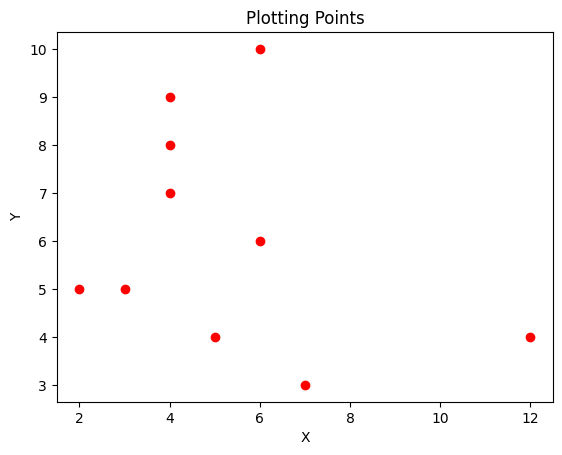

Number of clusters k: 5


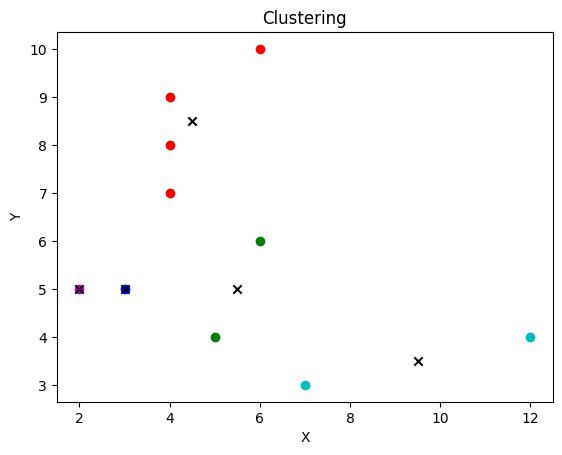

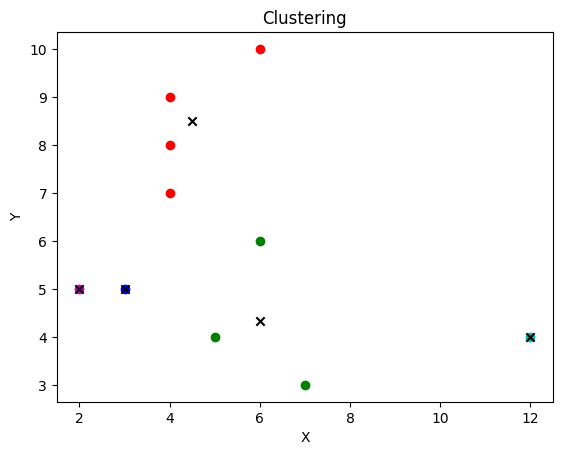

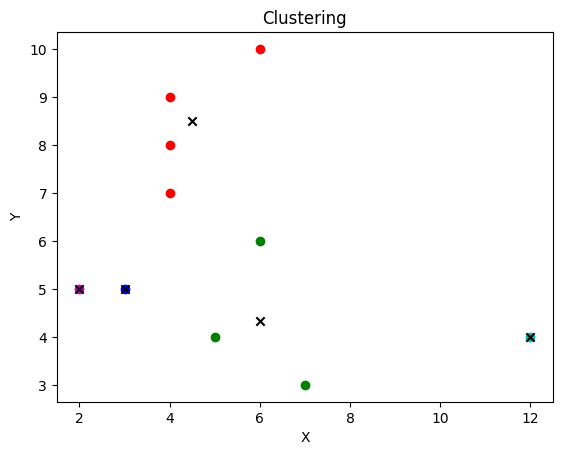

In [ ]:

def plot_clusters(clusters, centroids):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for i, cluster in enumerate(clusters):
        color = colors[i % len(colors)]
        x, y = zip(*cluster)
        plt.scatter(x, y, c=color)
    x_centroids, y_centroids = zip(*centroids)
    plt.scatter(x_centroids, y_centroids, marker='x', c='k')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Clustering')
    plt.show()

filename = '/content/kmean_clustering.csv'

dataset = load_dataset(filename)


x_coords, y_coords = zip(*dataset)
plt.scatter(x_coords, y_coords, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plotting Points')
plt.grid(False)
plt.show()

k = int(input("Number of clusters k: "))
clusters, centroids = kmeans(dataset, k)
plot_clusters(clusters, centroids)
